In [158]:
'''our task
To predict the Close price from 2018 to 2020. 
The exact dates are already present in the sample_solution.csv file. Replace the 0s in the Predicted column with your forecasted values!

You may submit several times to the public leaderboard, 
but your rankings will be determined using the private leaderboard.

Additional tasks
Apart from submission to Kaggle,
 you should also submit your Jupyter notebook,
showcasing your use of at least 3 algorithms/models, 
as well as how you come to get the final model that you use to get forecasted values.

The prediction results will be judged using the RMSE metrics.
'''

'our task\nTo predict the Close price from 2018 to 2020. \nThe exact dates are already present in the sample_solution.csv file. Replace the 0s in the Predicted column with your forecasted values!\n\nYou may submit several times to the public leaderboard, \nbut your rankings will be determined using the private leaderboard.\n\nAdditional tasks\nApart from submission to Kaggle,\n you should also submit your Jupyter notebook,\nshowcasing your use of at least 3 algorithms/models, \nas well as how you come to get the final model that you use to get forecasted values.\n\nThe prediction results will be judged using the RMSE metrics.\n'

<AxesSubplot:>

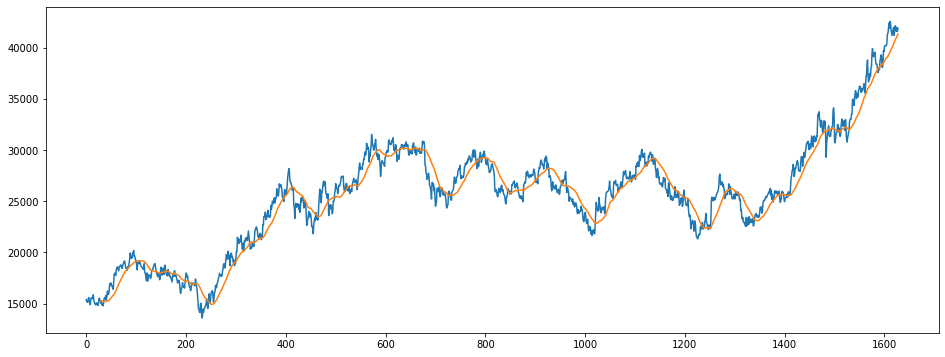

In [6]:
#let me first try the AR model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.ar_model import AutoReg

#plot the data to see how it looks 
file = open('data.csv')
df = pd.read_csv(file,sep=",")

#let me see the moving average of the past 30 days 
df['Close'].plot(figsize = (16,6))
df.rolling(window = 30).mean()['Close'].plot()


P-value:  0.8978963725565924


D:\ZLH\PYTHON\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


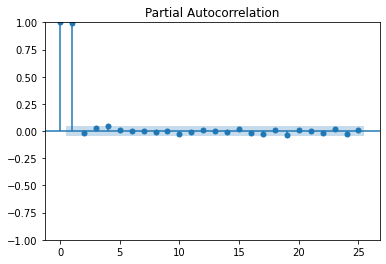

In [7]:

# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
from statsmodels.tsa.stattools import adfuller
#
# Run the test

df_stationarityTest = adfuller(df['Close'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Close'], lags=25)

In [8]:
#
# Create training and test data
#
train_data = df['Close'][:int(0.9*len(df))]
test_data = df['Close'][int(len(df)*0.9):]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=3).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1465
Model:                     AutoReg(3)   Log Likelihood              -10875.596
Method:               Conditional MLE   S.D. of innovations            411.541
Date:                Sun, 03 Oct 2021   AIC                          21761.191
Time:                        22:16:17   BIC                          21787.629
Sample:                             3   HQIC                         21771.053
                                 1465                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.6921     62.354      2.208      0.027      15.481     259.903
Close.L1       1.0267      0.026     39.362      0.000       0.976       1.078
Close.L2      -0.1108      0.037     -2.968      0.0

1465    31372.665642
1466    31312.573588
1467    31285.797542
1468    31265.966902
1469    31243.829053
            ...     
2711    26697.731018
2712    26697.682245
2713    26697.633712
2714    26697.585418
2715    26697.537361
Length: 1251, dtype: float64


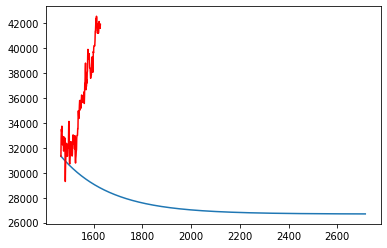

In [9]:
# Make the predictions
pred = ar_model.predict(start=int(0.90*len(df)), end=(len(df)+1087), dynamic=False)
print(pred)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [10]:
#from my AR model is does not look quite fit in to the prediction as the test data suggested 
#now i will try another model 

In [11]:
#let me use the ARIMA model to do the prediction 
print('shape of data', df.shape)


shape of data (1628, 6)


In [12]:
#check for stationarity 

from statsmodels.tsa.stattools import adfuller

df_stationarityTest = adfuller(df['Close'], autolag='AIC')

#  p-value
print("P-value: ", df_stationarityTest[1])
print('numer of order', df_stationarityTest[2])



P-value:  0.8978963725565924
numer of order 3


In [13]:
#get the order for ARIMA Model 
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [14]:
step_fit = auto_arima(df['Close'],trace=True,suppress_warnings=True)
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24368.911, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24390.269, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24390.072, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24389.640, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24390.549, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24370.108, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24368.388, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24386.516, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24379.311, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24370.041, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=24369.957, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24371.688, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=24369.958, Time=0.27 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 5.069 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1628
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -12179.194
Date:                Sun, 03 Oct 2021   AIC                          24368.388
Time:                        22:16:36   BIC                          24395.360
Sample:                             0   HQIC                         24378.395
                               - 1628                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.9227      4.807      1.648      0.099      -1.499      17.344
ar.L1          0.6413      0.127      5.049      0.000       0.392       0.890
ar.L2         -0.1204      0.024     -5.045      0.000      -0.167      -0.074
ma.L1         -0.6107      0.126     -4.849      0.000      -0.858      -0.364
sigma2      1.864e+05   4716.203     39.513      0.000    1.77e+05    1.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               300.20
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#order is SARIMAX(2, 1, 1)
import statsmodels.api
from statsmodels.tsa.arima_model import *

train_data_ARIMA = df[:1400]
test_data_ARIMA = df[1400:]

#train the model
model_arima = statsmodels.tsa.arima.model.ARIMA(train_data_ARIMA['Close'],order = (2,1,1))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1400
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10406.039
Date:                Sun, 03 Oct 2021   AIC                          20820.078
Time:                        22:16:39   BIC                          20841.052
Sample:                             0   HQIC                         20827.918
                               - 1400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5870      0.180      3.259      0.001       0.234       0.940
ar.L2         -0.0952      0.027     -3.507      0.000      -0.148      -0.042
ma.L1         -0.5679      0.179     -3.178      0.001      -0.918      -0.218
sigma2      1.696e+05   4963.984     34.169      0.000     1.6e+05    1.79e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               116.06
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.05
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1400    25065.253794
1401    25121.672398
1402    25154.288342
1403    25168.059746
1404    25173.036854
            ...     
1623    25175.271550
1624    25175.271550
1625    25175.271550
1626    25175.271550
1627    25175.271550
Name: predicted_mean, Length: 228, dtype: float64


<AxesSubplot:>

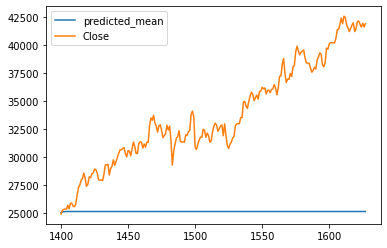

In [16]:
pred_ARIMA=model_arima.predict(start=len(train_data_ARIMA), end=len(train_data_ARIMA)+len(test_data_ARIMA)-1, typ = 'levels')
print(pred_ARIMA)
pred_ARIMA.plot(legend=True)
test_data_ARIMA['Close'].plot(legend=True)

In [17]:
test_data_ARIMA['Close'].mean()

33747.63157894737

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(pred_ARIMA,test_data_ARIMA['Close']) )
print(RMSE)#which is quite far away from the mean, it seems still acceptable 

9704.78911476175


<AxesSubplot:>

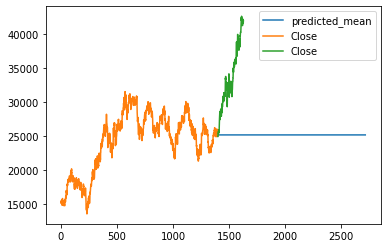

In [19]:
pred_ARIMA_full=model_arima.predict(start=len(train_data_ARIMA), end=len(train_data_ARIMA)+len(test_data_ARIMA)+1086, typ = 'levels')
pred_ARIMA_full.plot(legend=True)
train_data_ARIMA['Close'].plot(legend= True)
test_data_ARIMA['Close'].plot(legend=True)

# the result seems do not reflect the increasing trend!
#i suppose it is because the use of first 90% of data to train the model gives a trend of decreasing 
#while the last 10% of data shows greater increase 
# Thus, i decide to only use the last two year's stock price to predict 

In [20]:
df1 = df[1314:]

df_stationarityTest1 = adfuller(df1['Close'], autolag='AIC')

#  p-value
print("P-value: ", df_stationarityTest1[1])
print('numer of order', df_stationarityTest1[2])


P-value:  0.9734777765007095
numer of order 5


In [21]:
step_fit = auto_arima(df1['Close'],trace=True,suppress_warnings=True)
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4773.850, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4783.857, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4785.723, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4785.705, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4786.138, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4772.278, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4783.551, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4787.504, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4772.766, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4773.561, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4771.921, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4784.019, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4773.009, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4777.795, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  314
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2380.961
Date:                Sun, 03 Oct 2021   AIC                           4771.921
Time:                        22:16:58   BIC                           4790.652
Sample:                             0   HQIC                          4779.407
                                - 314                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.5661      8.224      2.379      0.017       3.448      35.684
ar.L1          0.8267      0.093      8.894      0.000       0.645       1.009
ar.L2         -0.1298      0.053     -2.465      0.014      -0.233      -0.027
ma.L1         -0.8550      0.079    -10.774      0.000      -1.010      -0.699
sigma2      2.431e+05   1.35e+04     18.018      0.000    2.17e+05     2.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               195.89
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
cutoff =int(0.8*len(df1))

In [23]:
#order is SARIMAX(2, 1, 1)


train_data_ARIMA1 = df1[:cutoff]
test_data_ARIMA1 = df1[cutoff:]

#train the model
model_arima = statsmodels.tsa.arima.model.ARIMA(train_data_ARIMA1['Close'],order = (2,1,1))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1905.082
Date:                Sun, 03 Oct 2021   AIC                           3818.164
Time:                        22:17:02   BIC                           3832.250
Sample:                             0   HQIC                          3823.833
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6576      0.208      3.164      0.002       0.250       1.065
ar.L2         -0.1326      0.054     -2.443      0.015      -0.239      -0.026
ma.L1         -0.6663      0.204     -3.267      0.001      -1.066      -0.267
sigma2      2.445e+05   1.47e+04     16.628      0.000    2.16e+05    2.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               242.98
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               3.18   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1565    37076.177341
1566    36965.790811
1567    36914.921313
1568    36896.105968
1569    36890.478047
            ...     
1623    36889.510075
1624    36889.510075
1625    36889.510075
1626    36889.510075
1627    36889.510075
Name: predicted_mean, Length: 63, dtype: float64


<AxesSubplot:>

<AxesSubplot:>

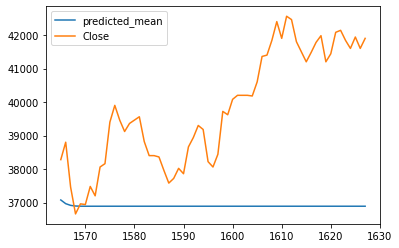

In [39]:
pred_ARIMA1=model_arima.predict(start=len(train_data_ARIMA1), end=len(train_data_ARIMA1)+len(test_data_ARIMA1)-1, typ = 'levels')
print(pred_ARIMA1)
pred_ARIMA1.plot(legend=True)
test_data_ARIMA1['Close'].plot(legend=True)

In [25]:
test_data_ARIMA1['Close'].mean()

39783.80952380953

In [27]:
RMSE = sqrt(mean_squared_error(pred_ARIMA1,test_data_ARIMA1['Close']) )
print(RMSE)#it becomes smaller!

3354.874950738756


<AxesSubplot:>

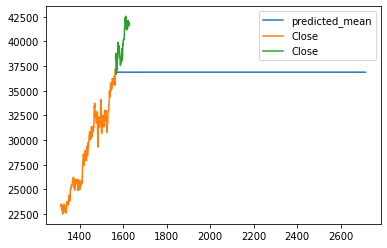

In [28]:
pred_ARIMA_full1=model_arima.predict(start=len(train_data_ARIMA1), end=len(train_data_ARIMA1)+len(test_data_ARIMA1)+1086, typ = 'levels')
pred_ARIMA_full1.plot(legend=True)
train_data_ARIMA1['Close'].plot(legend= True)
test_data_ARIMA1['Close'].plot(legend=True)
#i do feel something wrong with my model as it is not changing according to the trend 
#after i get the full data, i realise that my predication is the same, i have tried debugging yet cannot find the error:(

In [38]:
for i in pred_ARIMA_full1:
    print(i)


37076.17734149176
36965.79081127949
36914.92131336505
36896.10596842563
36890.47804747771
36889.27198826884
36889.22514366925
36889.35426759116
36889.44539499539
36889.488200395186
36889.50426642972
36889.50915567124
36889.51024052803
36889.51030561954
36889.51020456743
36889.5101294812
36889.510093502446
36889.51007979866
36889.51007555765
36889.510074585836
36889.510074509126
36889.510074587546
36889.51007464929
36889.51007467949
36889.51007469117
36889.510074694845
36889.51007469571
36889.51007469579
36889.51007469573
36889.51007469568
36889.51007469566
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889.51007469565
36889